## 분석에 필요한 다양한 라이브러리를 import합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
# 1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
#    - <https://pandas.pydata.org/docs/user_guide/index.html>
import numpy as np
# 2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
#    - <https://numpy.org/doc/stable/>
import matplotlib.pyplot as plt
# 3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
#    - <https://matplotlib.org/stable/users/index>

## 모델 학습에 사용할 데이터셋을 불러옵니다.

In [2]:
pd.set_option('display.max_columns', None)
Data_PATH_train = '../0.Data/tox21_train.csv'
Data_PATH_test = '../0.Data/tox21_test.csv'
# 전처리를 완료한 데이터셋을 불러옵니다.
# 이때, 상대 경로나 절대 경로를 지정하여 파일의 위치를 지정해주어야 합니다.
df_train = pd.read_csv(Data_PATH_train)
df_test = pd.read_csv(Data_PATH_train)
# pandas 라이브러리의 read_csv 메소드를 활용하여 csv 파일을 load합니다.
df_train

,maccs_1,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [3]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:,-1]

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:,-1]

# Train 과정에 사용할 데이터와 Test 과정에 사용할 데이터를 load한 이후, 
# 해당 데이터 중에서 독립변수와 반응변수를 별도로 저장해줍니다.

# df_train은 X_train(독립변수), y_train(반응변수)로,
# df_test는 X_test(독립변수), y_test(반응변수)로 분할합니다.

# maccs_2열[column = 0]부터 maccs_167열[column = 165]까지는 독립변수이고, 마지막 열(NR-AR)은 반응변수(정답값)입니다.

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(11130, 166) (11130,)
(11130, 166) (11130,)


## 모델을 생성합니다.

In [4]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(num_leaves=21, max_depth = -1, n_estimators = 100, min_child_samples = 10, random_state=42)
model.fit(X_train, y_train)

# 학습에 사용할 모델은 Light Gradient Boosting Machine(LGMB Classier) 입니다.
# - LightGBM은 결정 트리(Decision Tree)기반 앙상블 학습 알고리즘으로, 경량적인 Gradient Boosting Framework를 사용하여 고성능과 속도, 그리고 대규모 데이터 처리 능력이 있습니다.
# - LGBM 모델을 생성하고, 불러온 데이터를 기반으로 모델을 학습시켜보겠습니다.
# - 생성한 모델은 max_depth와 random_state 인자를 제외하면, 다른 하이퍼파라미터는 설정하지 않았기에 기본값이 사용됩니다.

[LightGBM] [Info] Number of positive: 5565, number of negative: 5565
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 11130, number of used features: 159
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(min_child_samples=10, num_leaves=21, random_state=42)

## Light Gradient Boosting Machine (LightGBM) Classifier의 하이퍼파라미터

### 주요 하이퍼파라미터

1. `num_leaves` : 하나의 트리가 가질 수 있는 최대 리프의 수입니다.
2. `max_depth` : 트리의 최대 깊이를 제한합니다. 과적합을 방지하기 위해 사용됩니다.
3. `min_data_in_leaf` : 리프 노드가 가지고 있어야 할 최소 데이터 수입니다. 과적합을 방지하기 위해 사용됩니다.
4. `learning_rate` : 각 부스팅 스텝에서의 학습률입니다. 낮은 값은 학습을 더 견고하게 만들지만, 더 많은 트리가 필요합니다.
5. `n_estimators` : 부스팅을 위해 생성할 트리의 수입니다.
6. `subsample` : 트리가 성장할 때 사용할 훈련 데이터의 비율입니다. 과적합을 방지하는 데 도움이 됩니다.
7. `colsample_bytree` : 트리를 구성할 때 사용할 피처의 비율입니다.
8. `reg_alpha` : L1 정규화 항입니다. 모델의 복잡도를 줄이는 데 도움이 됩니다.
9. `reg_lambda` : L2 정규화 항입니다. 과적합을 방지하는 데 도움이 됩니다.

### 추가 하이퍼파라미터

- `objective` : 최적화할 손실 함수를 지정합니다. 이진 분류, 다중 분류 등 다양한 목적 함수를 지원합니다.
- `boosting_type` : 부스팅의 유형을 지정합니다. 기본값은 'gbdt'(Gradient Boosting Decision Tree)입니다.
- `random_state` : 결과의 재현성을 위한 난수 시드입니다.
- `n_jobs` : 병렬 처리를 위해 사용할 병렬 스레드 수입니다.
- `importance_type` : 피처 중요도를 계산하는 방법입니다.

LightGBM은 이 외에도 다양한 하이퍼파라미터를 제공합니다. 자세한 내용은 공식 문서를 참고하세요.

- 공식 문서 링크: [LightGBM Documentation](https://lightgbm.readthedocs.io/en/latest/Parameters.html)


## Light Gradient Boosting Machine (LightGBM) Classifier의 목적함수

LightGBM에서 이진 분류를 위한 목적 함수는 로지스틱 손실(또는 이진 크로스 엔트로피 손실)을 사용합니다. 이 함수는 실제 레이블과 예측된 확률 사이의 차이를 측정합니다. 이진 분류 문제에서의 목적 함수는 다음과 같이 표현됩니다:

$$ L(y, p) = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)] $$

여기서:
- $L(y, p)$는 로지스틱 손실 함수입니다.
- $N$은 데이터 포인트의 총 개수입니다.
- $y_i$는 $i$번째 데이터 포인트의 실제 레이블입니다. 이진 분류에서 $y_i$는 0 또는 1의 값을 가집니다.
- $p_i$는 모델이 $i$번째 데이터 포인트가 1(양성 클래스)로 분류될 확률을 예측한 값입니다.
- $\log$는 자연 로그를 의미합니다.

이 손실 함수는 모델이 실제 레이블을 정확하게 예측할수록 낮은 값을 가지며, 예측이 틀릴수록 높은 값을 가집니다. 목적은 이 손실 함수의 값을 최소화하는 것입니다.

LightGBM 공식 문서 및 추가 정보를 찾고 싶으시면, LightGBM의 GitHub 페이지나 공식 문서 사이트를 방문하시면 됩니다. LightGBM의 공식 GitHub 페이지는 다음과 같습니다:

- LightGBM GitHub 페이지: [https://github.com/microsoft/LightGBM](https://github.com/microsoft/LightGBM)

공식 문서는 여기서 찾을 수 있습니다:

- LightGBM 공식 문서: [https://lightgbm.readthedocs.io/](https://lightgbm.readthedocs.io/)


## Light GBM Classifier 시각화

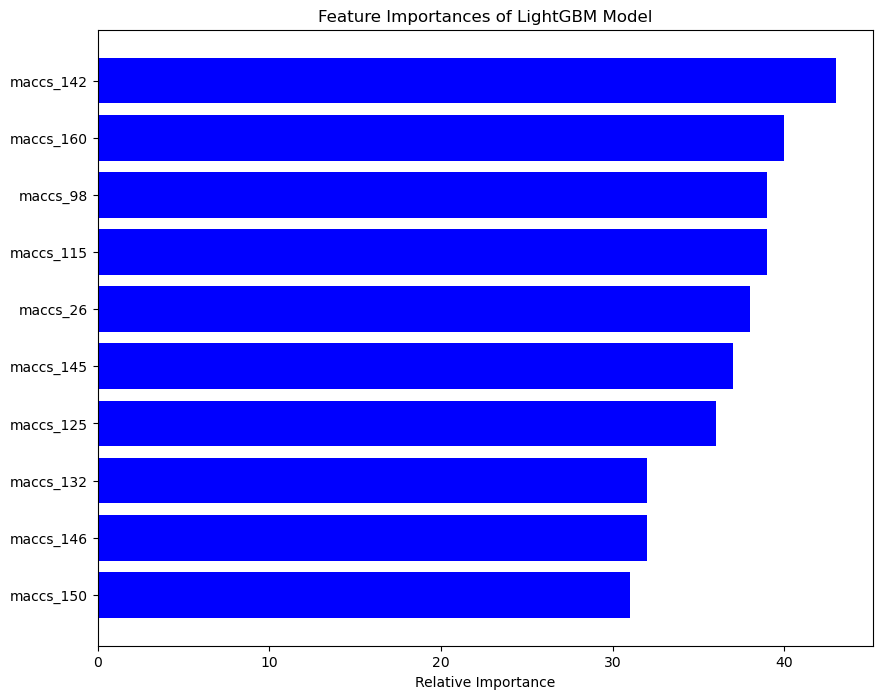

In [5]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X_train.columns.tolist()

feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[-10:]

# 시각화
plt.figure(figsize=(10, 8))
plt.title('Feature Importances of LightGBM Model')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# - 앙상블 기법을 사용하는 LightGBM의 특성 상, 모델은 여러 개의 결정 트리로 구성됩니다. 각 트리는 전체 모델의 예측에 일부분을 기여하며, 개별 트리가 아닌 모든 트리의 조합이 최종 예측 성능을 결정합니다. 
# - 따라서, 개별 트리를 출력하거나 분석하는 것은 전체 모델의 작동 방식을 완전히 이해하는 데에는 한계가 있습니다.
# - 피처 중요도는 모델이 어떤 피처를 기반으로 예측을 수행하는지, 그리고 각 피처가 모델의 예측 성능에 얼마나 크게 기여하는지를 확인할 수 있습니다. 
# - 피처 중요도는 모델 내 모든 트리에 걸쳐 계산되며, 특정 피처가 모델의 결정에 얼마나 영향을 미쳤는지를 나타냅니다. 

## 결정 경계 시각화

[LightGBM] [Info] Number of positive: 5565, number of negative: 5565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11130, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


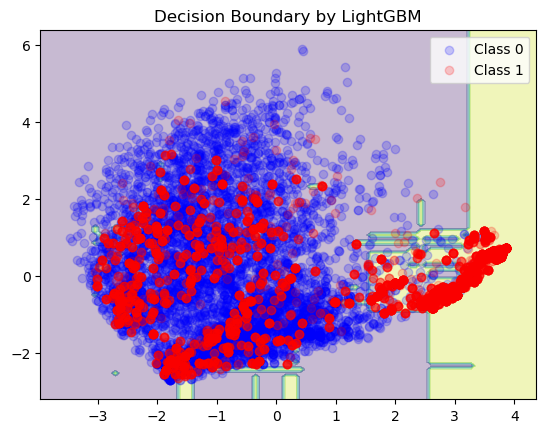

Confusion Matrix in X_pca Dataset


array([[5198,  367],
       [ 965, 4600]], dtype=int64)

In [6]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# LightGBM 모델 학습
model_pca = LGBMClassifier(num_leaves=21, max_depth = -1, n_estimators = 100, min_child_samples = 10, random_state=42)
model_pca.fit(X_pca, y_train)

# 결정 경계 시각화를 위한 그리드 생성
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
# x1s: X_pca의 첫 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
# x2s: X_pca의 두 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x1, x2 = np.meshgrid(x1s, x2s)
# x1, x2: x1s와 x2s를 격자로 나눈 배열
X_new = np.c_[x1.ravel(), x2.ravel()]
# X_new: x1과 x2를 1차원 배열로 변환한 후, 열로 합친 배열

# LightGBM 모델을 사용하여 예측
y_pred = model_pca.predict(X_new).reshape(x1.shape)

# 결정 경계 및 데이터 포인트 시각화
plt.contourf(x1, x2, y_pred, alpha=0.3)
# x1, x2, y_pred를 사용하여 등고선을 그립니다.
plt.scatter(X_pca[:, 0][y_train==0], X_pca[:, 1][y_train==0], color='blue', alpha=0.2, label='Class 0')
# y가 0인 행을 파란색으로 점으로 표시합니다.
plt.scatter(X_pca[:, 0][y_train==1], X_pca[:, 1][y_train==1], color='red', alpha=0.2, label='Class 1')
# y가 1인 행을 빨간색으로 점으로 표시합니다.
plt.title("Decision Boundary by LightGBM")
plt.legend()
plt.show()

# 아래 그림은 두 Feature를 사용하여 Light gbm Classifier를 학습한 결과입니다. 2차원 축을 사용하여 결정 경계를 쉽게 표현할 수 있기에, 
# PCA를 사용하여 Feature 개수를 2개로 줄인 후 이를 시각화하였습니다.

print("Confusion Matrix in X_pca Dataset")
confusion_matrix(y_train, model_pca.predict(X_pca))
# 혼동 행렬을 출력합니다.

## 혼동 행렬을 출력합니다.

In [7]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix
print("Confusion Matrix in Test Dataset")
confusion_matrix(y_test, model.predict(X_test))

# 혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
# - 5322개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
# - 243개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
# - 84개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
# - 5481개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)


Confusion Matrix in Test Dataset


array([[5322,  243],
       [  84, 5481]], dtype=int64)